In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [3]:
def preprocessing(df):
    encoder=LabelEncoder()
    
    encoded=encoder.fit_transform(df["Stage_fear"])
    df["Stage_fear"]=encoded
    
    encoder2=LabelEncoder()
    encoded2=encoder2.fit_transform(df["Drained_after_socializing"])
    df["Drained_after_socializing"]=encoded2

    df["Time_spent_Alone"] = df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].mean())
    df["Social_event_attendance"] = df["Social_event_attendance"].fillna(df["Social_event_attendance"].mean())
    df["Going_outside"] = df["Going_outside"].fillna(df["Going_outside"].mean())
    df["Friends_circle_size"] = df["Friends_circle_size"].fillna(df["Friends_circle_size"].mean())
    df["Post_frequency"] = df["Post_frequency"].fillna(df["Post_frequency"].mean())

    return df

In [4]:
df=preprocessing(df)
encoder3=LabelEncoder()
encoded3=encoder3.fit_transform(df["Personality"])
df["Personality"]=encoded3

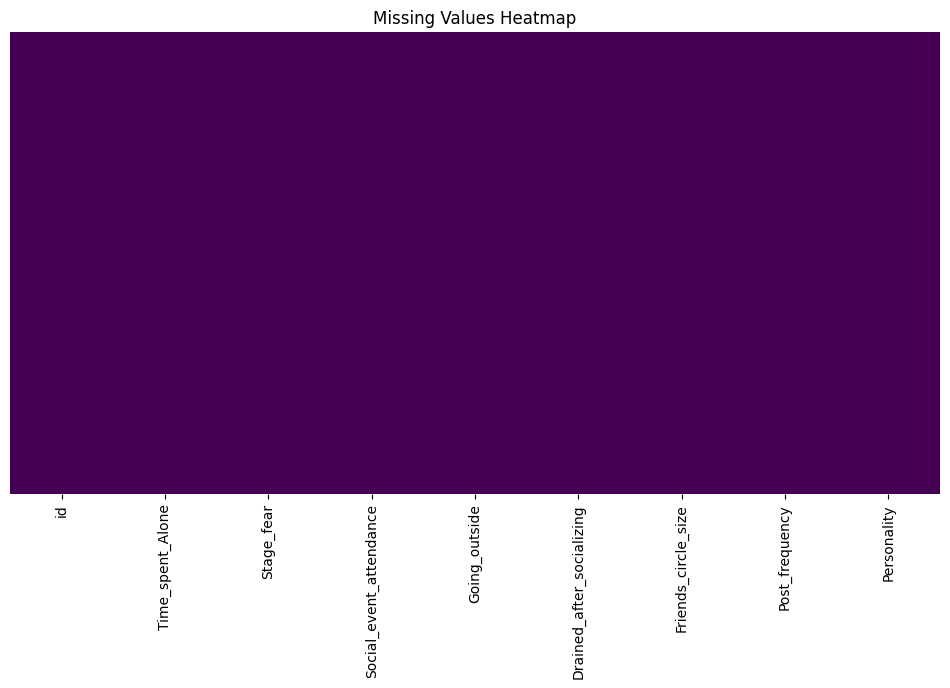

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
X=df.drop("Personality",axis=1)
y=df["Personality"]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=3000,class_weight="balanced")

model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000)

In [9]:
model.score(X_test,y_test)

0.9662618083670715

**+++++++++++++++++++++++++++++++++++++++++++++++TEST++++++++++++++++++++++++++++++++++++++++++++++**

In [10]:
df=pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [11]:
df=preprocessing(df)

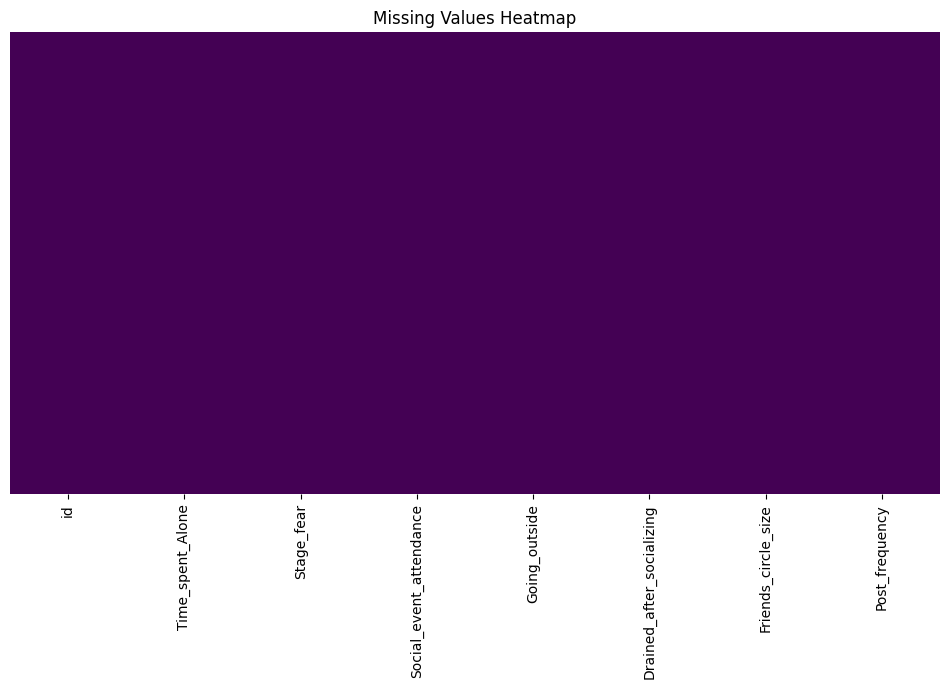

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
X=df

In [14]:
predictions=model.predict(X)
print(predictions)

[0 1 0 ... 0 0 1]


In [15]:
predictions=encoder3.inverse_transform(predictions)
print(predictions)

['Extrovert' 'Introvert' 'Extrovert' ... 'Extrovert' 'Extrovert'
 'Introvert']


In [16]:
submission = pd.DataFrame({
    "id": df["id"],
    "Personality": predictions
})

In [17]:
submission.to_csv("result.csv",index=False)